<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/linear_regression__boston_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

#scikit-learn includes the boston housing dataset ## soon will be taken out 
boston_dataset = load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

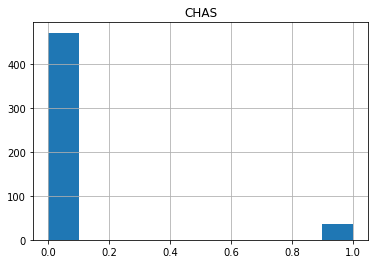

In [3]:
#build a DataFrame
boston = pd.DataFrame(boston_dataset.data, 
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target


#plotting histogram directly from the DataFrame 
boston.hist(column='CHAS') #CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
plt.show() #most values are 0 (most tracts do not bound river)

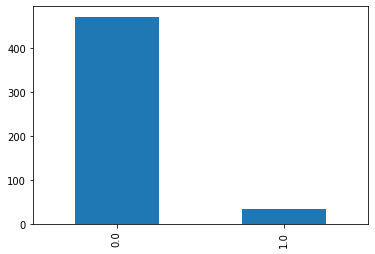

In [4]:

#plotting same data as bar graph, works better because there are only two possible values, 0 or 1
chas_counts = boston['CHAS'].value_counts()
chas_counts.plot(kind='bar')
plt.show()


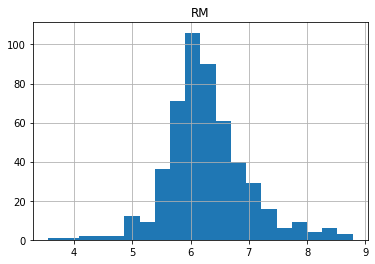

In [8]:
#more histograms
boston.hist(column='RM', bins=20) #RM: number of rooms
plt.show() #distribution appears normal and symetric (as mean is close to median)

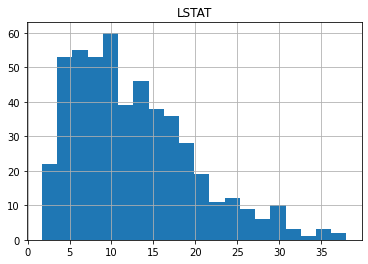

In [9]:
boston.hist(column='LSTAT', bins=20) #LSTAT: % lower status of the population
plt.show() #right skewed distribution 

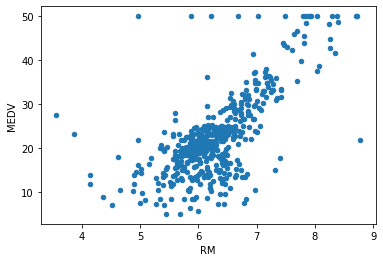

In [10]:
#plotting scatter plot to show relationship between two variables
boston.plot(kind='scatter', x='RM', y='MEDV') #MEDV: Median value of owner-occupied homes in $1000’s
plt.show() #scatter plot shows positive correlation between RM and MEDV (as RM goes up, MEDV goes up)

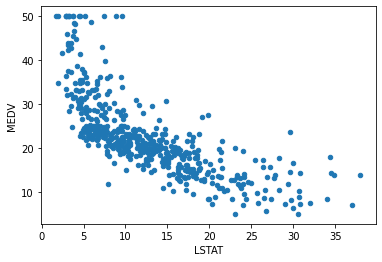

In [11]:
boston.plot(kind='scatter', x='LSTAT', y='MEDV') 
plt.show() #scatter plot shows negative correlation between LSTAT and MEDV (as LSTAT goes up, MEDV goes down *inverse relationship*)

In [12]:
###building linear regression model

#data preperation - feature selection
y = boston['MEDV'] #1d (lowercase by convention)
X = boston[['RM']] #2d 

###workflow: import -> instantiate -> fit -> predict

##import linear regression class
from sklearn.linear_model import LinearRegression

##instantiate model
model = LinearRegression()

#split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
  test_size = 0.3, 
  random_state = 42) 

##fit  
model.fit(X_train, y_train)

#output the slope and intercept
print(model.coef_.round(2))
print(model.intercept_.round(2))


[9.12]
-34.66


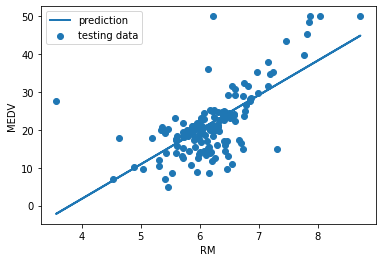

In [15]:
##predict 
y_test_predicted = model.predict(X_test)

###evaluating the model

#comparing actual test values (scatter) to model's predictions (fitted line)
plt.scatter(X_test, y_test, label='testing data')
plt.plot(X_test, y_test_predicted, label='prediction', linewidth=2)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

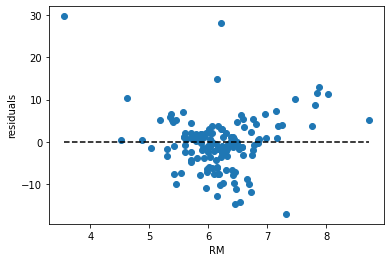

In [14]:
#calculating residuals (difference between observed values and predicted values, closer to 0 the better)
residuals = y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0, xmin = X_test.min(), xmax = X_test.max(), linestyle='--')
plt.xlabel('RM')
plt.ylabel('residuals')
plt.show()
#seemingly random distribution of residuals scattered around the y=0 line, a sign that the model is working

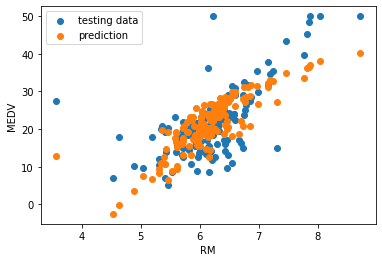

In [16]:
### multivariate linear regression

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

## data preparation
## feature selection
X = boston[['RM','LSTAT']] #multible variables
y = boston['MEDV']

## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## instantiate
model = LinearRegression()

## fit
model.fit(X_train, y_train)

## predict 
y_test_predictions = model.predict(X_test)

## evaluating model performance 

#blue scatter = testing data actual values RM vs MEDV
#orange scatter = model predictions 
plt.scatter(X_test['RM'], y_test, label='testing data')
plt.scatter(X_test['RM'], y_test_predictions, label='prediction')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

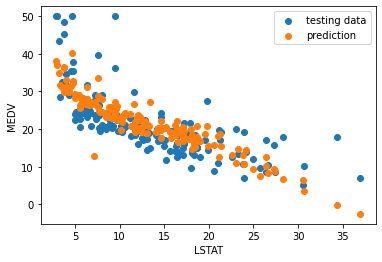

In [17]:
#blue scatter = testing data actual values LSTAT vs MEDV
#orange scatter = model predictions 
plt.scatter(X_test['LSTAT'], y_test, label='testing data')
plt.scatter(X_test['LSTAT'], y_test_predictions, label='prediction')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

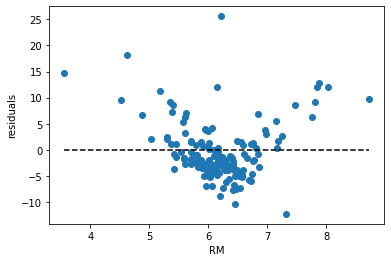

In [18]:
#calculating residuals 
residuals = y_test - y_test_predictions

# plot the residuals against obversed 'RM' values
plt.scatter(X_test['RM'], residuals)
plt.hlines(y = 0, xmin = X_test['RM'].min(), xmax = X_test['RM'].max(), linestyle='--')
plt.xlabel('RM')
plt.ylabel('residuals')
plt.show()

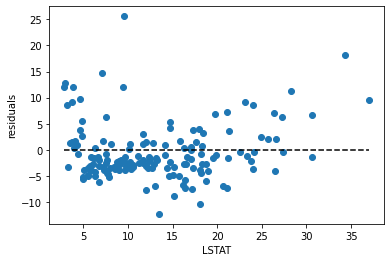

In [19]:
# plot the residuals against obversed 'LSTAT' values
plt.scatter(X_test['LSTAT'], residuals)
plt.hlines(y = 0, xmin = X_test['LSTAT'].min(), xmax = X_test['LSTAT'].max(), linestyle='--')
plt.xlabel('LSTAT')
plt.ylabel('residuals')
plt.show()

# code and comments by github.com/alandavidgrunberg